In [1]:
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt

os.environ['DISPLAY'] = 'localhost:10.0'
os.chdir('/home/ishan/honors_thesis/scripts')
from scripts import dlc_rnn, utils

from sklearn.metrics import mean_squared_error

file = '/home/ishan/honors_thesis/scripts/flyRNN.hdf5'
model = dlc_rnn.LSTM1Dense1(mpath = file, gputouse=1)
np.random.seed(1)

Using TensorFlow backend.
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ishan/anaconda3/lib/python3.7/site-packages/tensorflo

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [5]:
Xtrain = h5py.File('/home/ishan/honors_thesis/validation_set/Xtrain.h5')['joint_angles']
Ytrain = h5py.File('/home/ishan/honors_thesis/validation_set/Ytrain.h5')['joint_angles']
preds = model.model.predict(Xtrain)

In [6]:
Xtrain = Xtrain[:]*(180/np.pi)

In [7]:
preds = preds*(180/np.pi)
Ytrain = Ytrain[:]*(180/np.pi)

In [8]:
#mse = np.reshape((preds - Ytrain), (30000,30))
mse = np.reshape((Xtrain - Ytrain), (30000,30))

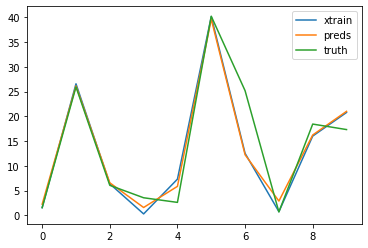

In [9]:
N = slice(0,10)
lag = slice(1)
angle = 20
plt.plot(Xtrain[N,lag,angle], label='xtrain')
plt.plot(preds[N,lag,angle], label='preds'), plt.plot(Ytrain[N,lag,angle], label='truth')
plt.legend()

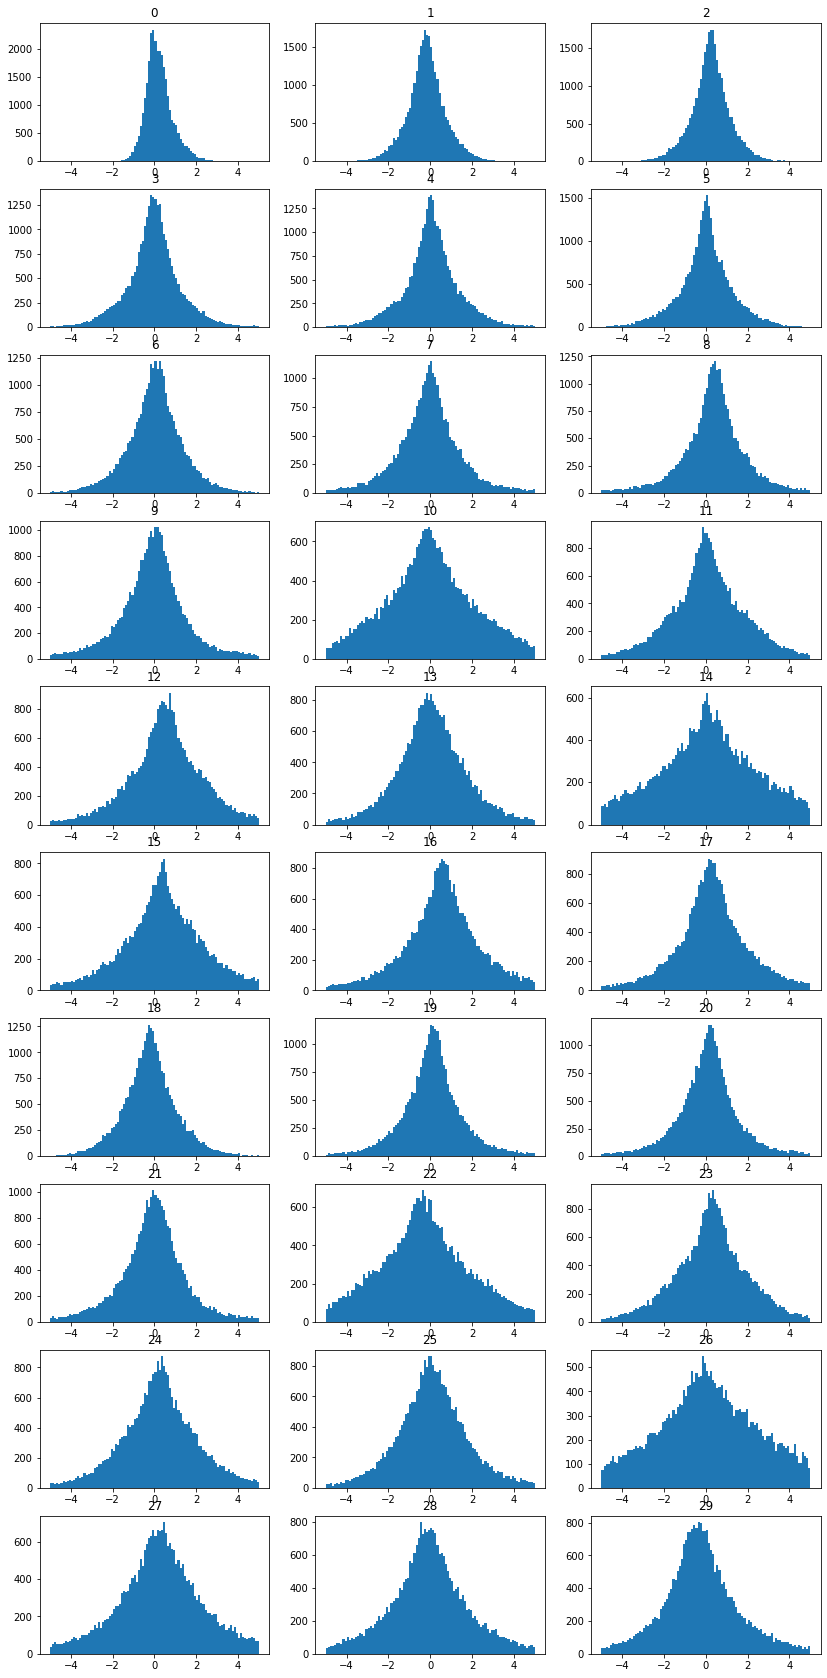

In [13]:
fig, axes = plt.subplots(10,3,figsize=(14,30))
for feat in range(30):
    ax = axes[feat//3][feat%3]
    ax.set_title(str(feat))
    _ = ax.hist((Ytrain-preds)[:,:,feat].flatten(), bins=100, range=(-5,5))


In [11]:
Ytrain.shape

(3000, 10, 30)

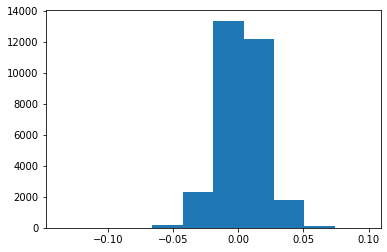

In [23]:
%matplotlib inline
plt.figure()
plt.hist(mse[:,1])
plt.show()